<a href="https://colab.research.google.com/github/chafita/MLfundamentals/blob/main/report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report 2

Esta organizado de la siguiente manera:
1. Inspección rapida de datos. Particion de archivos.
2. ML classical. Algoritmos de clasificación.
3. CNN + data augmentation.
4. Testing

Originalmente son 3 notebooks, ahora estan agrupados en este notebook. Cada subseccion importará sus librerias necesarias para el buen funcionamiento.

## 1. Partición




Breve información sobre Olivetti Dataset:

* Hay diez imágenes diferentes de cada una de las 40 personas distintas.
* Hay 400 imágenes de rostros en el conjunto de datos
* Las imágenes de la cara se tomaron en diferentes momentos, variando la iluminación, la expresión facial y el detalle facial.
* Todas las imágenes de rostros tienen fondo negro
* Las imágenes son nivel de gris
* El tamaño de cada imagen es 64x64
* Los valores de píxeles de la imagen se escalaron al intervalo [0, 1]
* Los nombres de 40 personas se codificaron en un número entero del 0 al 39

In [20]:
# Librerias
import sys
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import os
from sklearn.model_selection import StratifiedShuffleSplit

# Importo las imagenes de la libreria sklearn (son las mismas que la de practica).
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

# Para mas placer...
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


### Chusmeando

In [21]:
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

* __faces__ es un diccionario que tiene tres key: 'data', 'image', 'terget'. Image es la matriz de grayscale que se puede usar para plotear la imagen, mientras que data son los mismos datos pero puestos en un array de 1D. Este ultimo van a ser los usados para entrenar, validar y testear el modelo de MLclassical, mientras 'image' van a ser usadas en CNN.

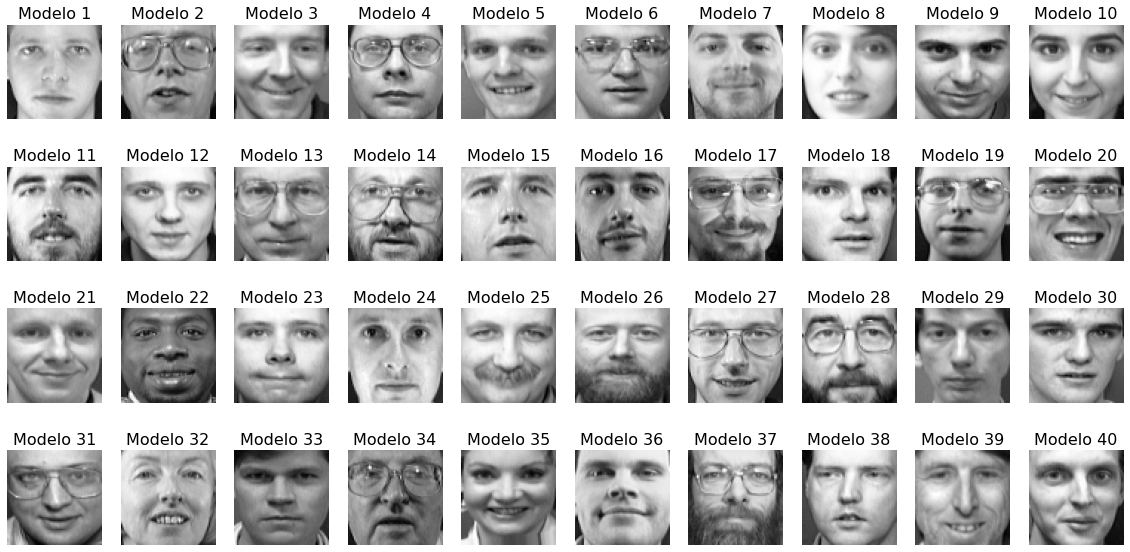

In [22]:
fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = faces['images'][10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("Modelo {}".format(i), fontsize=16)
    plt.axis('off')
    
plt.show()

#print(faces)

### Stratified split

In [33]:
# inicio el metodo
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)

# obtengo los indices para el train_valid y el test. 
train_valid_idx, test_idx = next(strat_split.split(faces['images'], faces['target']))

# genero el train y test
X_train_valid = faces['images'][train_valid_idx]
y_train_valid = faces['target'][train_valid_idx]
X_test_img = faces['images'][test_idx]
y_test_img = faces['target'][test_idx]

# mismo procedimiento pero separo el train de la validacion
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train_img = X_train_valid[train_idx]
y_train_img = y_train_valid[train_idx]
X_valid_img = X_train_valid[valid_idx]
y_valid_img = y_train_valid[valid_idx]

# Genero los train, valid y test para las data-set. Los targe
## Transformo los data en las imagenes
def images2data(X):
    return np.reshape(X,(np.shape(X)[0],np.shape(X)[1]*np.shape(X)[2]))
X_train_ = images2data(X_train_img)
X_valid_ = images2data(X_valid_img)
X_test_ = images2data(X_test_img)

y_train = y_train_img
y_valid = y_valid_img
y_test = y_test_img

* Separo del conjunto de datos el {train, validation, test}_set. Como son solo 400 fotos, me aseguro que este balanceado la cantidad de fotos por clases en cada set. Esto lo propongo de esta forma porque lo que estoy interesado es que mi modelo clasifique bien 40 ID de personas. Podria pasar que si no hago una particion balanceada, en el test o valid no tenga fotos de algun ID y no pueda calcular que tmbien clasifica en todos los casos mi modelo. 


In [13]:
# inspeccion de los tamaños de las matrices de faces.images
n_samples, h, w = faces['images'].shape

# Variable X y features para el el modelo de ML
X = faces['data']
n_features = X.shape[1]

# El target a predecir es la ID de la persona.
y = faces['target']
n_classes = len(np.unique(y))

print("Dimensiones de la matriz faces.image:")
print("h: %d" % h)
print("w: %d" % w)
print("Tamaño total de la data:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Dimensiones de la matriz faces.image:
h: 64
w: 64
Tamaño total de la data:
n_samples: 400
n_features: 4096
n_classes: 40


### Grafico los porcentajes de las particiones

(280, 4096) (280,)
(80, 4096) (80,)
(40, 64, 64) (40,)


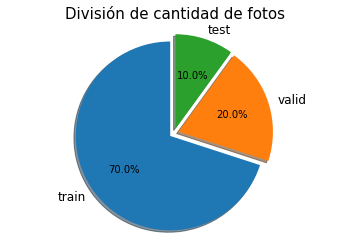

In [54]:
print(X_train_.shape, y_train_.shape)
print(X_valid_.shape, y_valid_.shape)
print(X_test.shape, y_test.shape)
totalsize=X_train_.shape[0]+X_valid_.shape[0]+X_test.shape[0]

labels = 'train', 'valid', 'test'
sizes = [X_train_.shape[0]/totalsize, X_valid_.shape[0]/totalsize, X_test.shape[0]/totalsize]
explode = (0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.set_title('División de cantidad de fotos', fontsize=15)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 2. ML classical

Esta seccion desarrolla el algoritmo de machine learning de reconocimiento facial.
    
.

#### Proceso:
1. Reduccion de dimensionalidad: PCA 
2. Modelo:
    * ('LDA', LinearDiscriminantAnalysis()))
    * ("LR", LogisticRegression()))
    * ("KNN", KNeighborsClassifier(n_neighbors=5)))
    * ("RFC", RandomForestClassifier()))
    * ("DT", DecisionTreeClassifier()))
    * ("SVM", SVC())) + RandomSearch (para los hyperparametros)

In [24]:
######
#Esta celda importa las librerias necesarias para graficar imagenes y trabajar con la libreria de sklearn. 
######

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import preprocessing

# para el Data-aug
import cv2
from skimage.transform import rotate, AffineTransform, warp
from skimage import io 
import random
from skimage import img_as_ubyte
from skimage.util import random_noise


# Common imports
import numpy as np
import os
from time import time

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
    
### Defino una función para presentar los scores 
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    return

def metricas(y_true, y_predict):
    #print('Accuaracy: ', accuracy_score(y_true, y_predict))
    #print('Precision: ', precision_score(y_true, y_predict))
    #print('Recall', recall_score(y_true, y_predict))
    #print('F1', f1_score(y_true, y_predict))
    print(classification_report(y_true, y_predict))

#dimnesiones de las fotos
global h, w
h, w = 64, 64  

### Normalization
* La data esta normalizada. Sin embargo voy a asegurarme de tener un protocolo de normalizacion min-max.

In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train_)
X_valid = min_max_scaler.fit_transform(X_valid_)


### Reduccion de dimensionalidad (PCA) 
* Recordemos que hay 64x64=4064 'features' (cantidad de pixeles) y solo 280 imagen para entrenar el modelo... Voy a hacer una reducción de dimensionalidad con **PCA**.

* De paso, saco las _autocaras_ obtenidas del PCA que el modelo va a usar para clasificar y las 'chusmeo'.

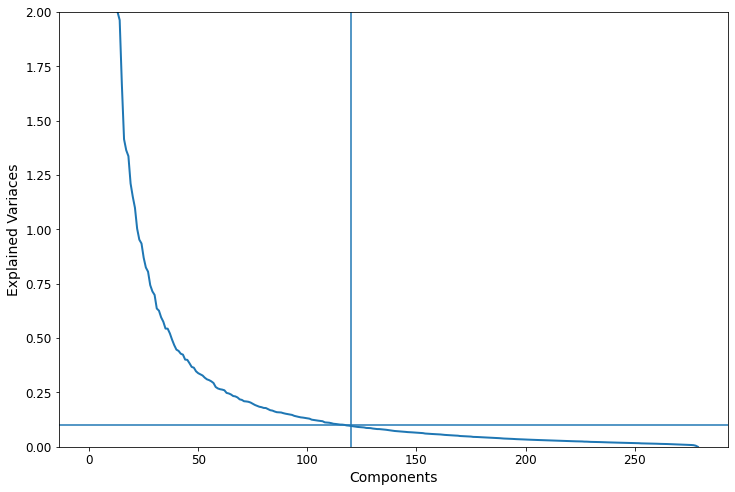

In [35]:
# Buscando el optimo numero de principal componentes (en escala log)
pca=PCA()
pca.fit(X_train)

plt.figure(1, figsize=(12,8))
plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.ylim(0,2)
plt.axvline(120)
plt.axhline(0.1)


* A partir de 120 componentes, la varianza cae por debajo de 0.1

In [36]:
pca = PCA(0.9, whiten=True) 
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_valid_pca = pca.transform(X_valid)
print('n_components %d'%pca.n_components_)
print("Se extrajo %d 'autocaras' de %d caras" % (pca.n_components_, X_train.shape[0]))
eigenfaces = pca.components_.reshape((pca.n_components_, h, w))
n_component=pca.n_components_

n_components 58
Se extrajo 58 'autocaras' de 280 caras


Text(0.5, 1.0, 'Average Face')

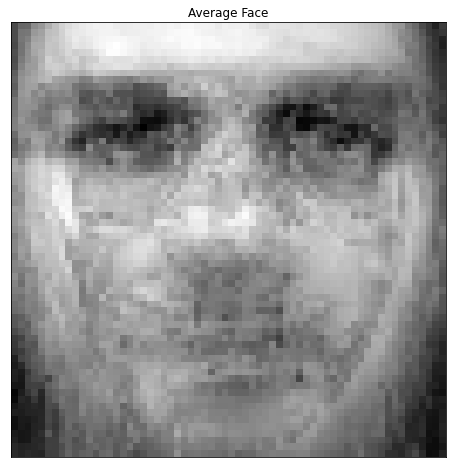

In [37]:
# La "cara promedio"... que lindo
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

* La cara promedio: se llega a ver las facciones de una cara 'sin-dueño' o cara 'tipica'(?): los ojos, la nariz, la boca y los contornos.


Text(0.5, 0.98, 'Las autocaras')

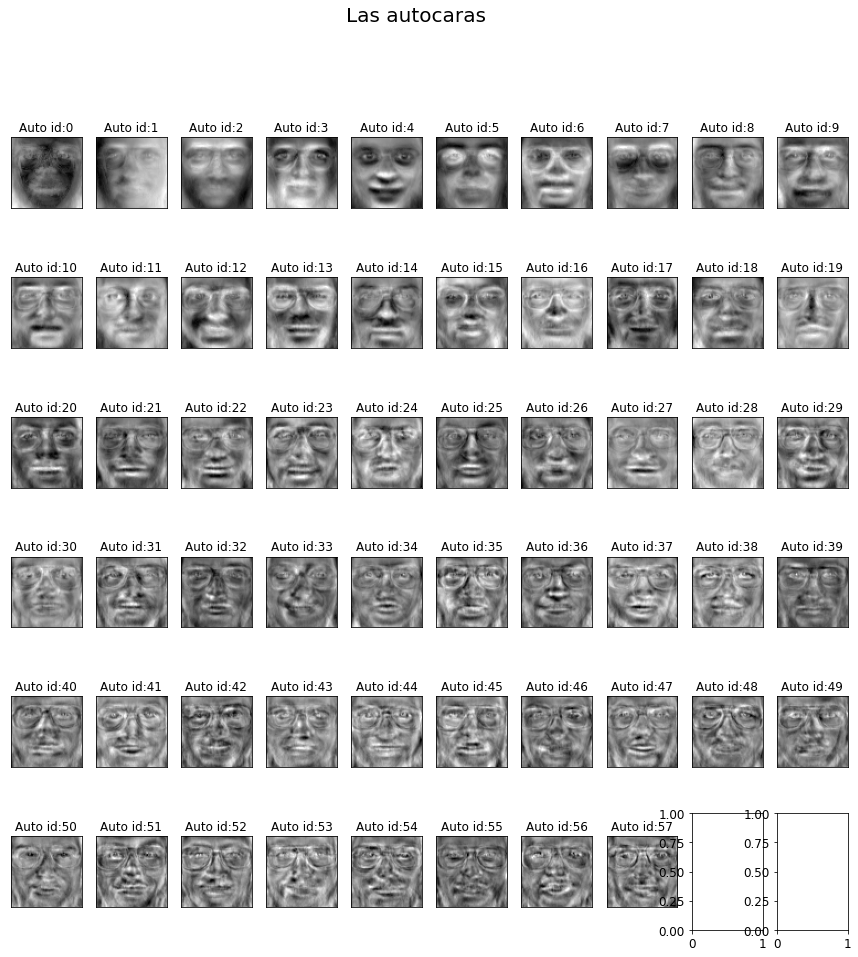

In [38]:
eigen_faces=pca.components_.reshape((n_component, 64, 64))

cols=10
rows=int(n_component/cols)+1
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(n_component):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("Auto id:{}".format(i))
plt.suptitle("Las autocaras", fontsize=20)

### NOTAS:
* A partir de la auto-cara 16, las siguientes, todas tienen "lentes".
* Las primeras 10 caras son la mas distintas.
* Luego de la cara 20, las siguientes son muy parecidas, poco cambio de luminosidad, facciones muy repetidas...

**Segun los tres puntos de arriba, y guiado un poco por la intuicion voy a usar solo las primeras 20 autocaras.**

In [39]:
n_component=20
pca = PCA(n_component, whiten=True) 
pca.fit(X_train)
X_train_pca_ = pca.transform(X_train)
X_valid_pca_ = pca.transform(X_valid)
print('n_components %d'%pca.n_components_)
print("Se extrajo %d 'autocaras' de %d caras" % (pca.n_components_, X_train.shape[0]))
eigenfaces = pca.components_.reshape((pca.n_components_, h, w))
n_component=pca.n_components_

# Guardo el PCA
#pickle.dump(pca,open('PCA.pkl', 'wb'))

n_components 20
Se extrajo 20 'autocaras' de 280 caras


### Normalizacion
* Chequeo y corrijo la data si no esta normalizada. Uso Min-Max method

In [40]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_pca = min_max_scaler.fit_transform(X_train_pca_)
X_valid_pca = min_max_scaler.fit_transform(X_valid_pca_)

print(np.max(X_train_pca),np.min(X_train_pca))

1.0000001 0.0


### Modelos:
* Hago una pasada rapida por distintos modelos, luego selecciono los que mejor vayan.

In [41]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("RFC",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    model.fit(X_train_pca, y_train)

    y_pred=model.predict(X_valid_pca)
    print(2*"=","Resultado {}".format(name).upper(),2*"=")
    print("Accuracy:{:0.2f}".format(metrics.accuracy_score(y_valid, y_pred)))
    print()

== RESULTADO LDA ==
Accuracy:0.90

== RESULTADO LR ==
Accuracy:0.91

== RESULTADO KNN ==
Accuracy:0.90

== RESULTADO RFC ==
Accuracy:0.86

== RESULTADO DT ==
Accuracy:0.45

== RESULTADO SVM ==
Accuracy:0.96



* LDA, LR, SVM son los modelos que mejor dan. Uso estos. Agrego RFC por curiosidad.
* Chequeo los modelos con **cross-validation** pero manteniendo la proporcion de los targets a verificar (uso Stratified): esto lo hago para que cada validacion tenga la mas completa informacion de todos los targets. 

In [42]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("RFC",RandomForestClassifier()))
models.append(("SVM",SVC()))

for name, model in models:
    print(name)
    model.fit(X_train_pca, y_train)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train_pca, y_train, cv=cv, scoring='accuracy')
    display_scores(scores)
    print(3*'\n')
    

LDA
Scores: [0.94642857 0.98214286 0.92857143 0.98214286 0.91071429 0.96428571
 0.98214286 0.96428571 0.94642857 0.98214286 0.94642857 0.91071429
 0.94642857 0.94642857 0.91071429]
Mean: 0.95
Standard deviation: 0.025421614885788826




LR
Scores: [0.82142857 0.85714286 0.83928571 0.83928571 0.85714286 0.76785714
 0.83928571 0.875      0.85714286 0.91071429 0.85714286 0.78571429
 0.91071429 0.82142857 0.85714286]
Mean: 0.8464285714285715
Standard deviation: 0.03734377890799551




RFC
Scores: [0.875      0.91071429 0.85714286 0.91071429 0.875      0.89285714
 0.875      0.875      0.875      0.92857143 0.89285714 0.875
 0.89285714 0.82142857 0.80357143]
Mean: 0.8773809523809523
Standard deviation: 0.031180478223116186




SVM
Scores: [0.91071429 0.96428571 0.92857143 0.94642857 0.92857143 0.85714286
 0.91071429 0.96428571 0.94642857 0.96428571 0.96428571 0.89285714
 0.94642857 0.91071429 0.92857143]
Mean: 0.9309523809523809
Standard deviation: 0.029785704769516207






* Los standard-desviation dan muy parecidos todos, en la segunda cifra significativa entre ~0.03
* **LDA tiene la mejor performance** (con los datos de train). ~LR la peor

* Veamos las 4 matrices de confusion
* Aplico un KFold (un cv "uniforme y ordenado" en la partición) ahora, para cambiar un poco de ambiente. Veremos que los resultados del mean-CV dan muy parecidos a los de antes.

LDA mean cross validations score:0.95
LR mean cross validations score:0.78
RFC mean cross validations score:0.85
SVM mean cross validations score:0.91


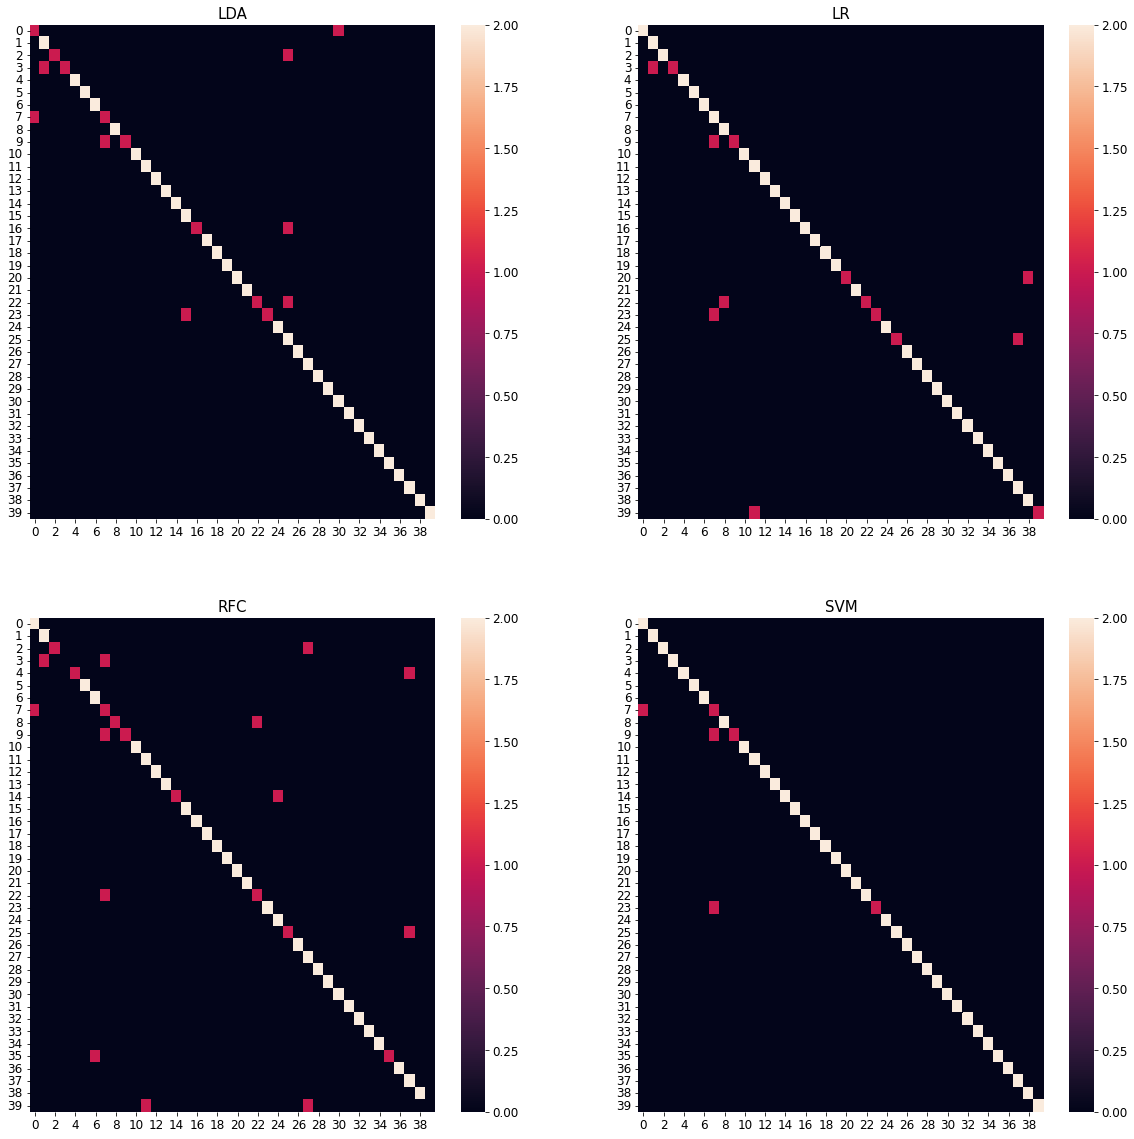

In [43]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("RFC",RandomForestClassifier()))
models.append(("SVM",SVC()))

fig,axss = plt.subplots(2,2,figsize=(20,20))
axs=axss.flatten()
for (name, model), ax in zip(models,axs):
    model.fit(X_train_pca, y_train)
    kfold=KFold(n_splits=10, shuffle=True, random_state=0)
    cv_scores=cross_val_score(model, X_train_pca, y_train, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))
    
    y_pred=model.predict(X_valid_pca)
    cm=metrics.confusion_matrix(y_valid, y_pred)
    sns.heatmap(cm,ax=ax)
    ax.set_title(name,fontsize=15)

* Usamos el set_valid para la matriz de confusion.
* El set_valid tiene dos fotos por target (esto es por haber hecho una particion unifirme en el target).
* Los cuadraditos rojos significan que es un target del modelo fuera del real. Un target "confundido".
* LDA si bien su score es bastante alto (95%) cuando vemos la matriz confusion, hay mucho mas datos "confundidos" que SVM. Esto significa que puede estar *overfiteando* los datos... funciona muy bien para los train y mal para los vaild... **Me quedo con SVM.**

### SVM + RandomizedSearch
* De los modelos elijo SVM para probar modelos que no he usado antes. 
* Voy a explorar un poco los hyperparametros del modelo de SVC que da bien pero falta mejorar.

In [44]:
'''Para una C alta , tendremos una menor regularización y eso significa que estamos tratando de ajustar 
el conjunto de entrenamiento lo mejor posible. En cambio, con valores bajos del parámetro C, el algoritmo 
intenta ajustarse a la «mayoría» de los puntos de datos y aumentar la generalización del modelo.
'''

t0 = time()
#param_grid = {
#    "C": [0.1,1],
#    "gamma": [1e-3,1e-2],
#}

param_grid = {
    "C": loguniform( 1e1, 1e5),
    "gamma": loguniform(1e-5, 1e-1),
}

clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10, cv=5)
clf = clf.fit(X_train_pca, y_train)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(clf, X_train_pca, y_train, cv=cv, scoring='accuracy')
display_scores(scores)

print("Tiempo: %0.3fs" % (time() - t0))
print("El mejor estimador encotrado:")
print(clf.best_estimator_)

# Guardo el modelo
#pickle.dump(clf,open('model_SVC.pkl', 'wb'))


Scores: [0.94642857 0.92857143 0.92857143 0.92857143 0.94642857 0.98214286
 0.875      0.98214286 0.94642857 0.98214286 0.96428571 0.96428571
 0.94642857 0.875      0.92857143]
Mean: 0.9416666666666665
Standard deviation: 0.03225289805748586
Tiempo: 10.561s
El mejor estimador encotrado:
SVC(C=36944.270269501045, class_weight='balanced', gamma=0.07483461454329232)


* Con la busqueda random de hyperparametros se mejoró de 0.93 a 0.94 el valor medio.
* Recordemos que hasta aca no usamos el set_valid mas que para chequear la matriz de confusion.

### Validación
* ¿overfitea?

In [45]:
### train
print('Train:')
y_predict=clf.predict(X_train_pca)
metricas(y_train, y_predict)
### valid
print('Valid:')
y_predict=clf.predict(X_valid_pca)
metricas(y_valid, y_predict)


Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         7
          17       1

* Los valores de train los predice al pie de la letra.. los de validacion en un 93% que coincide con el CV de mas arriba. Nice

## 3. CNN

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import StratifiedShuffleSplit
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
from tensorflow.keras import regularizers


import warnings
warnings.filterwarnings('ignore')

# para el Data-aug
import cv2
from skimage.transform import rotate, AffineTransform, warp
from skimage import io 
import random
from skimage import img_as_ubyte
from skimage.util import random_noise


import os



### Chusmeando x2

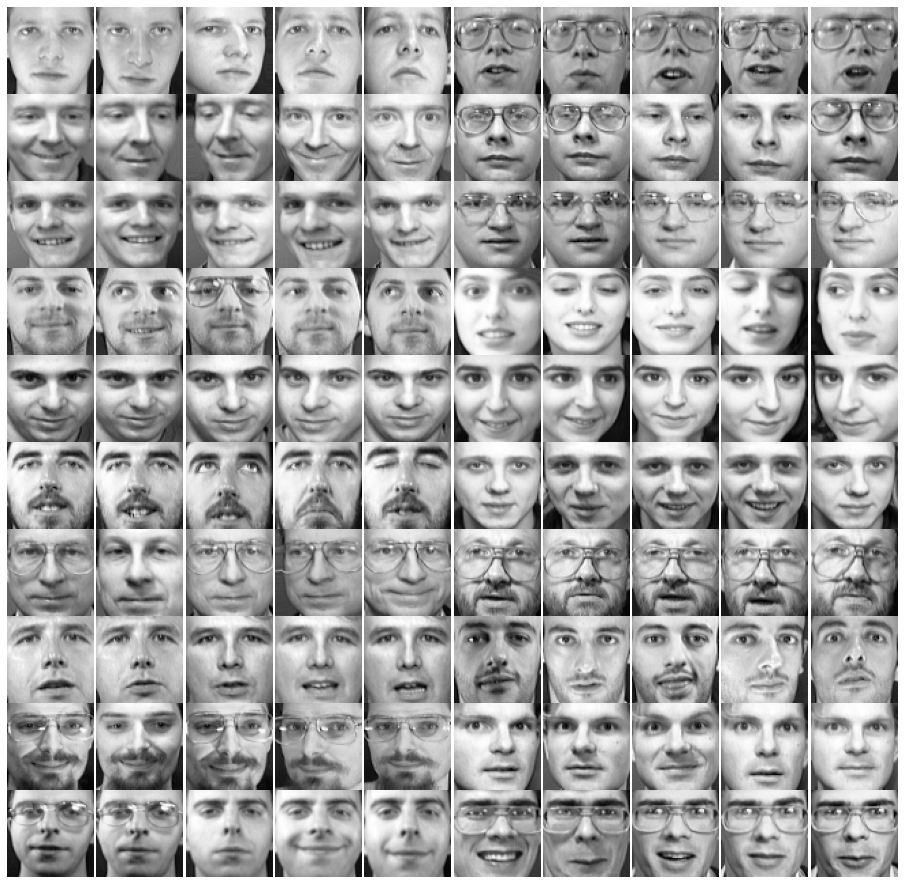

In [49]:
fig, axes = plt.subplots(10, 10, figsize=(16, 16))
fig.subplots_adjust(hspace=0, wspace=0)
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i*2], cmap='gray')
    ax.axis('off')

#### Notas
1. Ojos: abiertos, cerrados, con lentes, dsintitna direcciones de mirada. 
2. Perfiles: con distintos angulos (frontales, suaves laterales)
3. Boca: cerradas, abiertas, con dientes, sin dientes, con lengua.
4. Menton/barbilla: con/sin barba y vigoten. 
5. Gestos: expresiones faciales generales varias (felices, enojados, tristes, riendo, "y a mi que", ...)
5. Sexo: predomina hombres (parece haber solo dos target mujeres). 

### Nombro las variables a comodidad

In [66]:
X_train = X_train_img
y_train = y_train_img
X_valid = X_valid_img
y_valid = y_valid_img
# El test no lo toco. No lo voy a usar aca. 

### Data augmentation
* Primero genero la funciones que voy a usar.
* Luego chequeo su funcionamiento correcto. 
* Por ultimo hago el data augmentation del train y valid set por separados. 

In [53]:
#Lets define functions for each operation

## Rotaciones en +- 10 grados unicamente. 
## Esto va con la intencion de generar distintos "perfiles" de cara de las fotos originales. 
def anticlockwise_rotation(image):
    angle= random.randint(0,10)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,10)
    return rotate(image, -angle)

## Espejar las imagenes. 
def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

## Volverlas mas ruidosas, con "menos calidad".
def add_noise(image):
    return random_noise(image)

def blur_image(image):
    return cv2.GaussianBlur(image, (3,3),0)


#### Testeando funciones del data-aug

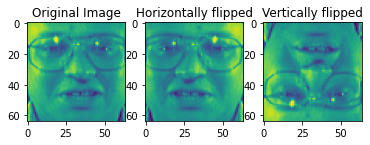

In [7]:
img=X_train[0]
plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(img)

hflipped_image= np.fliplr(img) #fliplr reverse the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(img) #flipud reverse the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()
print(np.min(img),np.max(img))
print(np.min(hflipped_image),np.max(hflipped_image))

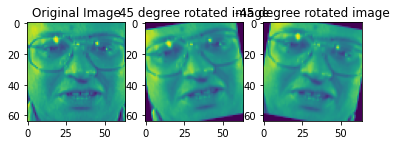

0.012396694 0.9214876
0.0 0.906075


In [8]:
r_image = rotate(img, angle=10) # angle value is positive for anticlockwise rotation 
r_image1 = rotate(img, angle=-10) #angle value is negative for clockwise rotation

plt.subplot(131)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("45 degree rotated image")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 degree rotated image")
plt.show()

print(np.min(img),np.max(img))
print(np.min(r_image),np.max(r_image))

0.012396694 0.9214876
0.0 1.0


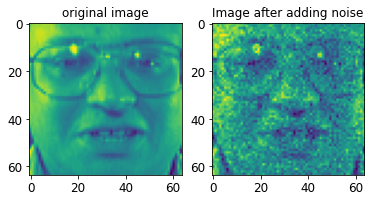

In [84]:
img=X_train[0]
noisy_image= random_noise(img)

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Image after adding noise')
plt.imshow(noisy_image)

print(np.min(img),np.max(img))
print(np.min(noisy_image),np.max(noisy_image))

0.012396694 0.9214876
0.12732437 0.8708677


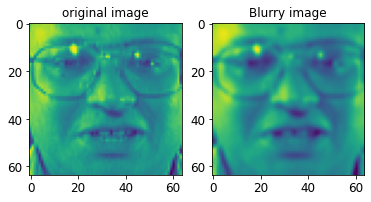

In [63]:
blur_image_= cv2.GaussianBlur(img, (3,3),0)

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Blurry image')
plt.imshow(blur_image_)

print(np.min(img),np.max(img))
print(np.min(blur_image_),np.max(blur_image_))

#### Data-aug()
* Genero la funicon que me va a generar la nueva data.

In [54]:
# Genero la data nueva (x10).

def data_aug(X_img, y_img, n_factor=10):
    
    # El filp vertical lo saque por alterar demasiado los datos generando figuras fuera de la "zoologia" original. 
    transformations = {'rotate anticlockwise': anticlockwise_rotation,
                           'rotate clockwise': clockwise_rotation,
                           'horizontal flip': h_flip, 
                           'adding noise': add_noise,
                           'blurring image': blur_image
                       }     
    
    images_to_generate=np.shape(X_img)[0]*n_factor  # cantidad default de factor = 100
    i=1                        
    X_aug=[]
    y_aug=[]
    
    while i<=images_to_generate: 
        
        # Selecciono una imagen random del set original
        index=random.randint(0,len(X_img)-1) 
        original_image = X_img[index]
        y_new=y_img[index] # guardo el target correspondiente a la imagen
        
        
        transformed_image=None   #imagen generada
        n = 0   #variable iterable
        transformation_count = random.randint(1, len(transformations)) # Elijo una transformacion random para la nueva imagen
        
        while n <= transformation_count: #pueden haber mas de 1 trasnformacion por imagen y maximo 6 tranformaciones. 
            key = random.choice(list(transformations)) #elijo 'randomente' la transformacion
            trans_f=transformations[key]
            transformed_image = trans_f(original_image)
            original_image = transformed_image
            n = n + 1
        X_aug.append(transformed_image)
        y_aug.append(y_new) #guardo el target original de la imagen

        i =i+1
    return X_aug, y_aug


In [55]:
## Train
X_train_aug, y_train_aug = data_aug(X_train, y_train, n_factor=5)
print(np.shape(X_train_aug), np.shape(y_train_aug))


# concateno todo (lo nuevo con lo viejo)
X_train_new = np.concatenate((X_train_aug, X_train)) 
y_train_new = np.concatenate((y_train_aug, y_train)) 
print(np.shape(X_train_new), np.shape(y_train_new))

print('porcentaje valid/(valid+train):',(np.shape(y_valid)[0]/(np.shape(y_train_new)[0]+np.shape(y_valid)[0]))*100)

(1400, 64, 64) (1400,)
(1680, 64, 64) (1680,)
porcentaje valid/(valid+train): 4.545454545454546


* Hasta aca he generado x5 la cantidad de imagenes.
* Hago una inspeccion rapida y random de las nuevas imagenes y las agrego al set de train/Valid

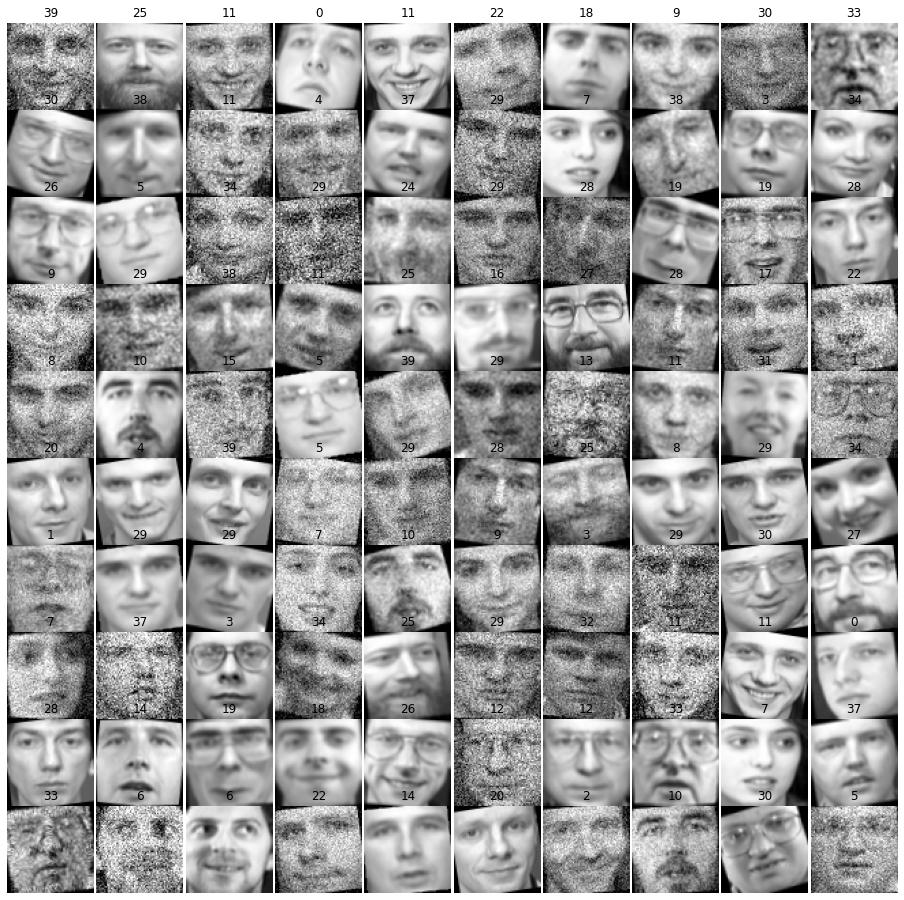

In [68]:
fig, axes = plt.subplots(10, 10, figsize=(16, 16))
fig.subplots_adjust(hspace=0, wspace=0)
for  ax in axes.flat:
    i=random.randint(0,len(X_train_aug)-1)
    ax.imshow(X_train_aug[i], cmap='gray')
    ax.set_title(y_train_aug[i])
    ax.axis('off')

#### Notas:
* OK, parece razonables las nuevas caras... de todo un poco.
* Las caras corresponden al target original.
* Hay caras borrosas... caras ruidosas... caras reflejadas... caras giradas... y caras con de todo un poco a la vez... ¿que tan bueno sera esto para entrenar la red?

### Model

* Hago un modelo tipo convolucional de redes neuronales, CNN. 

* Como input, CNN toma tensores del tamaño de las imagenes a analizar: (image_height=64, image_width=64, color_channels=1).

In [88]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer = regularizers.l1(1e-6), #strides=(1,1), 
                        input_shape=(64, 64, 1)))  # regularizo con l1. Esto me ayuda para el overfitting
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))



* La salida de cada capa Conv2D y MaxPooling2D es un tensor de forma 3D (alto, ancho, canales). El número de canales de salida para cada capa Conv2D está controlado por el primer argumento (por ejemplo, 32 o 64).

#### Dense-layers

* Las capas densas toman vectores como entrada (que son 1D), mientras que la salida actual es un tensor 3D. Primero, aplano la salida de la ultima capa (celda anterior) con layers.Flatten, esto es 3D --> 1D, luego agrego una _capa densa_. Al ser la ultima capa, tiene que tener el tamaño de la cantidad de target a predecir. 

In [89]:
model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(40))

In [90]:
# para ver la arquitectura del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_1 (Dense)             (None, 40)               

#### Copilo y entreno el modelo

In [91]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_new, y_train_new, epochs=25, 
                    validation_data=(X_valid, y_valid))

Epoch 1/25
53/53 [==============================] - 6s 97ms/step - loss: 3.6866 - accuracy: 0.0345 - val_loss: 3.6726 - val_accuracy: 0.0250
Epoch 2/25
53/53 [==============================] - 5s 92ms/step - loss: 3.5686 - accuracy: 0.0661 - val_loss: 3.3242 - val_accuracy: 0.1500
Epoch 3/25
53/53 [==============================] - 5s 91ms/step - loss: 2.7349 - accuracy: 0.3387 - val_loss: 1.8357 - val_accuracy: 0.6375
Epoch 4/25
53/53 [==============================] - 6s 122ms/step - loss: 1.3103 - accuracy: 0.7101 - val_loss: 0.8316 - val_accuracy: 0.8250
Epoch 5/25
53/53 [==============================] - 7s 125ms/step - loss: 0.6100 - accuracy: 0.8690 - val_loss: 0.4692 - val_accuracy: 0.8875
Epoch 6/25
53/53 [==============================] - 5s 100ms/step - loss: 0.3057 - accuracy: 0.9458 - val_loss: 0.2765 - val_accuracy: 0.9250
Epoch 7/25
53/53 [==============================] - 7s 137ms/step - loss: 0.1869 - accuracy: 0.9601 - val_loss: 0.2753 - val_accuracy: 0.9625
Epoch 8/2

3/3 - 0s - loss: 0.1490 - accuracy: 0.9750 - 75ms/epoch - 25ms/step


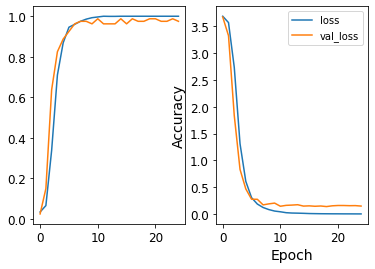

In [92]:
fig, [ax1,ax2] = plt.subplots(1,2)

ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'], label = 'val_accuracy')

ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')

ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('loss')

ax1.legend(loc='better')
ax2.legend(loc='better')
test_loss, test_acc = model.evaluate(X_valid,  y_valid, verbose=2)

* A partir de 10 epocas ya entra en el overfiting. Entreno la red hasta aqui

### Modelo final
* Elijo la cantidad de epocas para entrenar la CNN.

In [58]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer = regularizers.l1(1e-6), #strides=(1,1), 
                        input_shape=(64, 64, 1)))  # regularizo con l1. Esto me ayuda para el overfitting
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(40))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_new, y_train_new, epochs=10, 
                    validation_data=(X_valid, y_valid))

Epoch 1/10
53/53 [==============================] - 7s 106ms/step - loss: 3.6881 - accuracy: 0.0304 - val_loss: 3.6594 - val_accuracy: 0.0500
Epoch 2/10
53/53 [==============================] - 5s 103ms/step - loss: 3.5573 - accuracy: 0.0899 - val_loss: 3.2529 - val_accuracy: 0.1500
Epoch 3/10
53/53 [==============================] - 5s 101ms/step - loss: 2.6712 - accuracy: 0.3500 - val_loss: 1.7680 - val_accuracy: 0.7250
Epoch 4/10
53/53 [==============================] - 5s 102ms/step - loss: 1.2710 - accuracy: 0.7554 - val_loss: 0.6758 - val_accuracy: 0.8625
Epoch 5/10
53/53 [==============================] - 5s 102ms/step - loss: 0.5314 - accuracy: 0.8911 - val_loss: 0.4195 - val_accuracy: 0.9125
Epoch 6/10
53/53 [==============================] - 5s 100ms/step - loss: 0.2787 - accuracy: 0.9494 - val_loss: 0.3135 - val_accuracy: 0.9375
Epoch 7/10
53/53 [==============================] - 5s 101ms/step - loss: 0.1937 - accuracy: 0.9577 - val_loss: 0.2565 - val_accuracy: 0.9375
Epoch 

3/3 - 0s - loss: 0.1578 - accuracy: 0.9625 - 99ms/epoch - 33ms/step


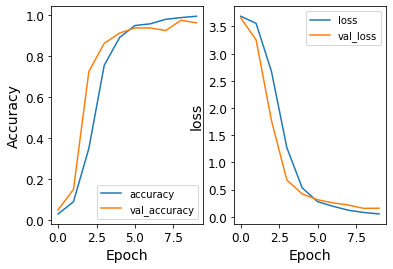

In [59]:
fig, [ax1,ax2] = plt.subplots(1,2)

ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'], label = 'val_accuracy')

ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')

ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('loss')

ax1.legend(loc='better')
ax2.legend(loc='better')
test_loss, test_acc = model.evaluate(X_valid,  y_valid, verbose=2)

## Testing

### SVM

In [47]:
# 1. Normalizo
X_test = min_max_scaler.fit_transform(X_test_)
# 2. Llevo al espacio del PCA usado
X_test_pca_ = pca.transform(X_test)
# 3. Normalizo nuevamete
X_test_pca = min_max_scaler.fit_transform(X_test_pca_)
# 4. Predigo con el clasificador (SVM)
y_predict=clf.predict(X_test_pca)

metricas(y_test, y_predict)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Un accuracy del 95%, coherente con la validacion! :-)

### CNN

In [65]:
# Predigo con CNN
print('Valid:', model.evaluate(X_valid_img,  y_valid_img, verbose=2))
print('Test', model.evaluate(X_test_img,  y_test_img, verbose=2))

3/3 - 0s - loss: 0.1578 - accuracy: 0.9625 - 168ms/epoch - 56ms/step
Valid: [0.15776976943016052, 0.9624999761581421]
2/2 - 0s - loss: 0.2493 - accuracy: 0.8750 - 92ms/epoch - 46ms/step
Test [0.24927005171775818, 0.875]


* Para el test obtuve un loss de 0.25 mientras con el set-valid 0.16. De igual forma, el accuracy fue menor, 87.5% mientras que en valid 96.25%. Para la cantidad de fotos que maneja test (40) esto significa que en 5 fotos falló la prediccion. Mientras que en el valid (80 fotos) falló en 3 fotos. Hay que mejorar el modelo :-/